Importing the dataset

In [ ]:
from google.colab import drive; drive.mount('/content/drive')
path = "/content/drive/MyDrive/personalized_medicine_gene_expression/data/"

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv(path + "gene_expression_drug_response.csv")

Prepare Features + Target

In [ ]:
X = df.drop('Drug_Response', axis=1); y = df['Drug_Response']

Standardize + PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=10).fit_transform(X_scaled)  # components for model input

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Train Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

Predict & Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test); print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4


Visualize Confusion Matrix

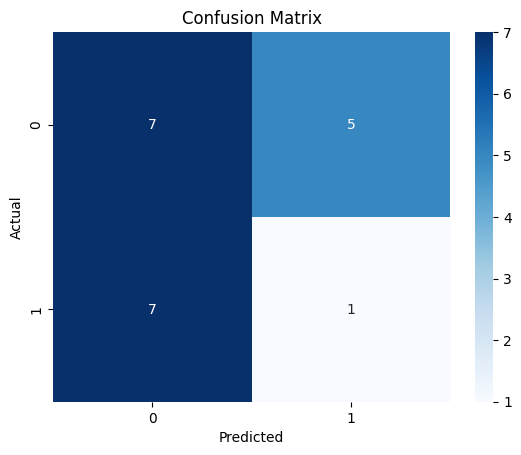

In [ ]:
import seaborn as sns; import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.savefig(path + "confusion_matrix.png"); plt.show()